## Generalized phase sensitivity function of modified Stuart-Landau (MSL) model

$$
\begin{aligned}
\dot{x} &= e^{2I}(x-y-I)-\left((x-I)^2+y^2\right)(x-I)\\
\dot{y} &= e^{2I}(x+y-I)-\left((x-I)^2+y^2\right)y
\end{aligned}
$$

### Setup

In [1]:
using GeneralizedPhaseModel
using DifferentialEquations, ForwardDiff, PyPlot

In [2]:
dxdt(X, I) = exp(2I)*(X[1]-X[2]-I)-((X[1]-I)^2+X[2]^2)*(X[1]-I)
dydt(X, I) = exp(2I)*(X[1]+X[2]-I)-((X[1]-I)^2+X[2]^2)*X[2]

F(X, I) = [dxdt(X, I), dydt(X, I)]

F (generic function with 1 method)

In [3]:
Imin = 0.0; Imax = 1.0; dI = 0.2
D = 2
Nθ = 1000
Irange = Imin:dI:Imax

dt = 1e-4
alg = Tsit5()

# analytical phase zero points
origin_val_idx = 2 
origin_thr = 0.0

itp = "linear" # interpolation mode

"linear"

Normally you need not specify a point of phase zero, but define it here for later comparison with the analytical solution.

### `generalized_phase_sensitivity_func` function

In [4]:
ωI, ζθI, ξθI, _ = generalized_phase_sensitivity_func(F, Imin, Imax, dI, D, Nθ, nothing, dt, alg, origin_val_idx, origin_thr, itp)

println("ωI:", size(ωI))
println("ζθI:", size(ζθI))
println("ξθI:", size(ξθI))

[1/3] Computing Xs(θ, I) and Z(θ, I)...100%|████████████| Time: 0:00:23


[2/3] Computing ζ(θ, I)...
[3/3] Computing ξ(θ, I)...
ωI:(6,)
ζθI:(1000, 6)
ξθI:(1000, 6)


These results are interpolated with `Interpolations.jl`. 

In [5]:
println("ω(I=0.4):", ωI(0.4), "=", ωI[3]) # I = 0.4
println("ω(I=0.6):", ωI(0.6), "=", ωI[4]) # I = 0.4

ω(I=0.4):2.225475616186585=2.225475616186585
ω(I=0.6):3.320045076448922=3.3200450764489227


In [6]:
println("ω(I=0.5):", ωI(0.5)) # I = 0.5

ω(I=0.5):2.772760346317754


### Comparing numerical and analytical results of MSL model

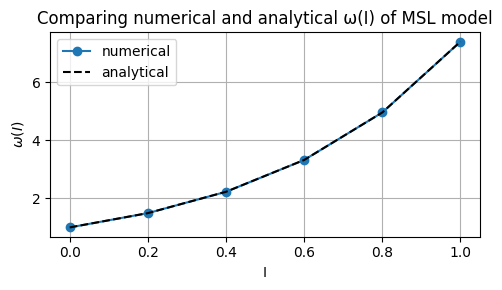

In [7]:
figure(figsize=(5, 3))
title("Comparing numerical and analytical ω(I) of MSL model")
plot(Irange, ωI, "o-", label="numerical")
plot(Irange, exp.(2*Irange), "k--", label="analytical")
grid(); xlabel("I"); ylabel(L"$\omega(I)$"); legend(); tight_layout()

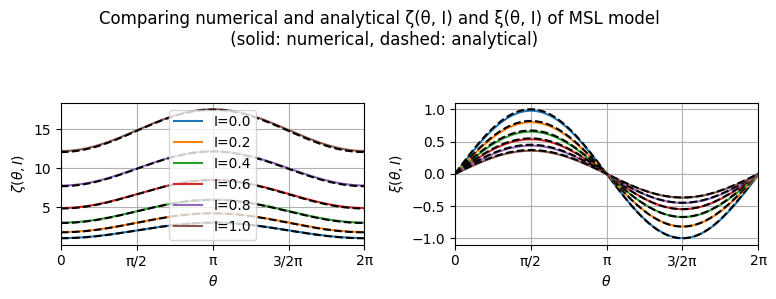

In [8]:
θ = range(0, 2π, length=Nθ) 

figure(figsize=(8, 3))
subplot(1,2,1)
suptitle("Comparing numerical and analytical ζ(θ, I) and ξ(θ, I) of MSL model \n (solid: numerical, dashed: analytical)")
for i = 1:size(Irange)[1]
    I = Irange[i]
    ζ_ = 2exp(2I) .- exp(I) * cos.(θ)
    plot(θ, ζθI(θ, Irange[i]), label="I="*string(I))
    plot(θ, ζ_, "k--")    
end
legend(); xlim(0, 2pi); xticks([0, 0.5pi, pi, 1.5pi, 2pi], ["0", "π/2", "π", "3/2π", "2π"]); 
grid(); xlabel(L"$\theta$"); ylabel(L"\zeta(\theta, I)")

subplot(1,2,2)
for i = 1:size(Irange)[1]
    I = Irange[i]
    ξ_ = exp(-I) * sin.(θ)

    plot(θ, ξθI(θ, Irange[i]), label="I="*string(I))
    plot(θ, ξ_, "k--")
end
xlim(0, 2pi); xticks([0, 0.5pi, pi, 1.5pi, 2pi], ["0", "π/2", "π", "3/2π", "2π"]);
grid(); xlabel(L"$\theta$"); ylabel(L"\xi(\theta, I)"); 
tight_layout(rect=[0,0,1,0.9])

### Comparing appriximated numerical and analytical results of MSL model

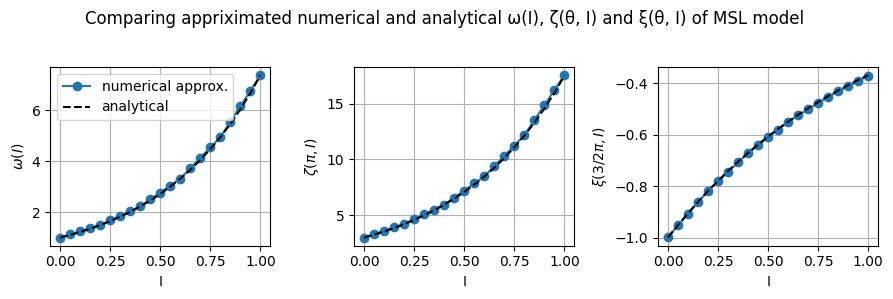

In [9]:
Irange_ = Imin:(dI/4):Imax

figure(figsize=(9, 3))
suptitle("Comparing appriximated numerical and analytical ω(I), ζ(θ, I) and ξ(θ, I) of MSL model")

subplot(1,3,1)
plot(Irange_, ωI(Irange_), "o-", label="numerical approx.")
plot(Irange_, exp.(2*Irange_), "k--", label="analytical")
grid(); xlabel("I"); ylabel(L"$\omega(I)$"); legend()

subplot(1,3,2)
plot(Irange_, ζθI(π, Irange_), "o-", label="numerical approx.")
plot(Irange_, 2exp.(2Irange_) .- exp.(Irange_) * cos(π), "k--", label="analytical")
grid(); xlabel("I"); ylabel(L"$\zeta(\pi, I)$")

subplot(1,3,3)
plot(Irange_, ξθI(3π/2, Irange_), "o-", label="numerical approx.")
plot(Irange_, exp.(-Irange_) * sin(3π/2), "k--", label="analytical")
grid(); xlabel("I"); ylabel(L"$\xi(3/2\pi, I)$"); 
tight_layout(rect=[0,0,1,0.95]) 

### Appendix : analytical solutions of MSL model

#### Model definement

$$
\begin{aligned}
\dot{x} &= e^{2I}(x-y-I)-\left((x-I)^2+y^2\right)(x-I)\\
\dot{y} &= e^{2I}(x+y-I)-\left((x-I)^2+y^2\right)y
\end{aligned}
$$

#### Vector fields

$$
F(X, I):=\left[e^{2I}(x-y-I)-\left((x-I)^2+y^2\right)(x-I), e^{2I}(x+y-I)-\left((x-I)^2+y^2\right)y\right]^\top
$$

#### Stable solution
$$
\begin{aligned}
x_0 &= e^{I}\cos \theta+I\\
y_0 &= e^{I}\sin \theta
\end{aligned}
$$

and let $X_0(\theta, I):=[x_0, y_0]$.

#### Phase
$$
\Theta(X, I)=\tan^{-1}\left(\frac{y}{x-I}\right)
$$

In general, $\Theta$ cannot be obtained in numerical models or real experimental systems.

#### Angular frequency

$$
\begin{aligned}
\omega(I)&=\frac{\partial \Theta(X, I)}{\partial X}\cdot F(X, I)\\
&=\left[\frac{\partial \Theta(X, I)}{\partial x}, \frac{\partial \Theta(X, I)}{\partial y}\right]^\top\cdot F(X, I)\\
&=\left[-\frac{y}{(x-I)^2+y^2}, \frac{x-I}{(x-I)^2+y^2}\right]^\top \cdot \left[e^{2I}(x-y-I)-\left((x-I)^2+y^2\right)(x-I), e^{2I}(x+y-I)-\left((x-I)^2+y^2\right)y\right]^\top\\
&=e^{2I}
\end{aligned}
$$
where $\cdot$ means dot product.

#### Phase sensitivity function

$$
\begin{aligned}
Z(\theta, I)&=\frac{\partial \Theta(X, I)}{\partial X}\biggm|_{\left(X_0(\theta, I), I\right)}=\left[-\frac{y}{(x-I)^2+y^2}, \frac{x-I}{(x-I)^2+y^2}\right]^\top\biggm|_{\left(X_0(\theta, I), I\right)}=\left[-e^{-I}\sin \theta, e^{-I}\cos\theta \right]^\top\\
\xi(\theta, I)&=\frac{\partial \Theta(X, I)}{\partial I}\biggm|_{\left(X_0(\theta, I), I\right)}=\frac{y}{(x-I)^2+y^2}\biggm|_{\left(X_0(\theta, I), I\right)}=e^{-I}\sin\theta\\
G\left(X(\theta, I), I\right)&=\left[\frac{\partial F_i(X, I)}{\partial I_j}\right]_{ij}=\left[e^{2I}(2x-2I-2y-1)+3(x-I)^2+y^2, e^{2I}(2x-2I+2y-1)+2y(x-I)\right]^\top\\
G\left(X_0(\theta, I), I\right)&=\left[2e^{3I}(\cos\theta-\sin\theta)+2e^{2I}\cos^2\theta, 2e^{3I}(\cos\theta+\sin\theta)+e^{2I}(2\cos\theta\sin\theta-1)\right]^\top\\
\zeta(\theta, I)&=G\left(X_0(\theta, I), I\right)^\top Z(\theta, I)=2e^{2I}-e^{I}\cos\theta
\end{aligned}
$$
